# Interactive Essay

## Introduction
In this interactive essay I will try to demonstrate the potential of *Jupyter Notebook*. My work will consist of a language analysis based on an article found on the Wide Web.

### First, what we need to do is import required modules for our code to operate smoothly.

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import re
import matplotlib.pyplot as plt

### Now, we send a request to a chosen url code by using the requestget().

In [8]:
page = requests.get("https://en.volleyballworld.com/volleyball/competitions/volleyball-nations-league/news/brazil-and-japan-hand-poland-and-slovenia-first-defeats-in-vnl-2024")

In [9]:
print(page)

<Response [200]>


In [10]:
print(page.content)

b'<!DOCTYPE html><html lang=en><head><meta charset=utf-8 /><meta name=viewport content="width=device-width, initial-scale=1.0"/><link rel="shortcut icon" href=https://images.volleyballworld.com/image/upload/f_auto/assets/favicons/favicon.ico /><link rel=icon href=https://images.volleyballworld.com/image/upload/f_auto/assets/favicons/favicon-16.png sizes=16x16 /><link rel=icon href=https://images.volleyballworld.com/image/upload/f_auto/assets/favicons/favicon-32.png sizes=32x32 /><link rel=icon href=https://images.volleyballworld.com/image/upload/f_auto/assets/favicons/favicon-64.png sizes=64x64 /><link rel=icon href=https://images.volleyballworld.com/image/upload/f_auto/assets/favicons/favicon-96.png sizes=96x96 /><link rel=icon href=https://images.volleyballworld.com/image/upload/f_auto/assets/favicons/favicon-128.png sizes=128x128 /><link rel=icon href=https://images.volleyballworld.com/image/upload/f_auto/assets/favicons/favicon-152.png sizes=152x152 /><link rel=icon href=https://im

### Before we go further, we need to use the package BeautifulSoup that allows to scrape information from web page.

In [11]:
soup = BeautifulSoup(page.content, 'html.parser')

### After that, we search for every paragraph element in the HTML content with the command content = soup.find_all('p'), and apply them to the variable content. The complete list of paragraph elements is provided by the print (content) statement.

In [12]:
paras = soup.find_all('p')
print(paras)

[<p class="oc-c-article__summary">Rookies Türkiye score historic first VNL victory<div class="oc-c-article__description"><div class="oc-c-article__publish-info"><div class="oc-c-article__date"><p>Published 01:56, 08 Jun 2024</p></div></div><div class="oc-c-article__share-bar"><ul class="d3-o-list d3-o-list--horizontal d3-o-share-bar"><li><a class="d3-o-share-bar__whatsapp" data-action="share/whatsapp/share" data-href="https://api.whatsapp.com/send?text=[currenturl]"><span class="fa-icon-svg fa-icon-svg--large"><svg class="fa-icon-svg fa-icon-svg--whatsapp_rounded" viewbox="0 0 24 24"><use xlink:href="#whatsapp_rounded"></use></svg></span> <span class="d3-o-share-bar--hover-text">Share on Whatsapp</span></a><li><a class="d3-o-share-bar__facebook" data-href="[currenturl]"><span class="fa-icon-svg fa-icon-svg--large"><svg class="fa-icon-svg fa-icon-svg--facebook_rounded" viewbox="0 0 48 48"><use xlink:href="#facebook_rounded"></use></svg></span> <span class="d3-o-share-bar--hover-text">Sh

### Now, we use a for loop along with the getText and strip methods, which extracts only the text from the linked website.

In [13]:
only_text = []

for el in paras:
    if len(el.getText().strip()) > 0:
        only_text.append(el.getText())

print(only_text)

['Rookies Türkiye score historic first VNL victoryPublished 01:56, 08 Jun 2024 Share on Whatsapp Share on Facebook Share on Twitter Copy link', 'Published 01:56, 08 Jun 2024', 'Japan’s setter Masahiro Sekita in action', 'No team remained unbeaten in the men’s Volleyball Nations League 2024 after Saturday’s Pool 3 matches in Fukuoka, where Brazil and hosts Japan handed Poland and Slovenia, respectively, their first defeats in the competition. Newcomers Türkiye, on the other hand, achieved a historic first win in the VNL by outclassing Iran earlier in the day.', 'In Saturday’s last match in Fukuoka, Japan delighted the home fans with a 3-1 (25-23, 19-25, 26-24, 25-21) victory over Slovenia, invincible in the competition until now. The Asian team climbed to third place in the current standings on a 6-2 win-loss record and 16 points, pushing their European opponents down to fourth on 6-1 and 15, but with a game in hand. This result also cost the Slovenians 7.45 points from their FIVB World

### The statement for sentence in only_text: repeats each element in text, while the statement print(sentence) will output the value of the variable sentence each time it is executed.

In [14]:
for sentence in only_text:
  print(sentence)

Rookies Türkiye score historic first VNL victoryPublished 01:56, 08 Jun 2024 Share on Whatsapp Share on Facebook Share on Twitter Copy link
Published 01:56, 08 Jun 2024
Japan’s setter Masahiro Sekita in action
No team remained unbeaten in the men’s Volleyball Nations League 2024 after Saturday’s Pool 3 matches in Fukuoka, where Brazil and hosts Japan handed Poland and Slovenia, respectively, their first defeats in the competition. Newcomers Türkiye, on the other hand, achieved a historic first win in the VNL by outclassing Iran earlier in the day.
In Saturday’s last match in Fukuoka, Japan delighted the home fans with a 3-1 (25-23, 19-25, 26-24, 25-21) victory over Slovenia, invincible in the competition until now. The Asian team climbed to third place in the current standings on a 6-2 win-loss record and 16 points, pushing their European opponents down to fourth on 6-1 and 15, but with a game in hand. This result also cost the Slovenians 7.45 points from their FIVB World Ranking score

### Now, we apply the "word_tokenize" method to tokenize our sentences from a scraped text. In order to split the text we use the punkt tokenizer.

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
for sentence in only_text:
  print(nltk.word_tokenize(sentence))

['Rookies', 'Türkiye', 'score', 'historic', 'first', 'VNL', 'victoryPublished', '01:56', ',', '08', 'Jun', '2024', 'Share', 'on', 'Whatsapp', 'Share', 'on', 'Facebook', 'Share', 'on', 'Twitter', 'Copy', 'link']
['Published', '01:56', ',', '08', 'Jun', '2024']
['Japan', '’', 's', 'setter', 'Masahiro', 'Sekita', 'in', 'action']
['No', 'team', 'remained', 'unbeaten', 'in', 'the', 'men', '’', 's', 'Volleyball', 'Nations', 'League', '2024', 'after', 'Saturday', '’', 's', 'Pool', '3', 'matches', 'in', 'Fukuoka', ',', 'where', 'Brazil', 'and', 'hosts', 'Japan', 'handed', 'Poland', 'and', 'Slovenia', ',', 'respectively', ',', 'their', 'first', 'defeats', 'in', 'the', 'competition', '.', 'Newcomers', 'Türkiye', ',', 'on', 'the', 'other', 'hand', ',', 'achieved', 'a', 'historic', 'first', 'win', 'in', 'the', 'VNL', 'by', 'outclassing', 'Iran', 'earlier', 'in', 'the', 'day', '.']
['In', 'Saturday', '’', 's', 'last', 'match', 'in', 'Fukuoka', ',', 'Japan', 'delighted', 'the', 'home', 'fans', 'with

### In here, the "pos_tag" function enables us to obtain parts of speech tags for the sentences. We may use a for loop to implement it, and tuples to display it. We also use the averaged perceptron tagger to assign POS tags to a list of tokens (words).

In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [22]:
tuples = []

for sentence in only_text:
    tokens = nltk.word_tokenize(sentence)
    pos_tagged = nltk.pos_tag(tokens)
    for item in pos_tagged:
        tuples.append(item)

print(tuples)

[('Rookies', 'NNS'), ('Türkiye', 'NNP'), ('score', 'NN'), ('historic', 'NN'), ('first', 'RB'), ('VNL', 'NNP'), ('victoryPublished', 'VBD'), ('01:56', 'CD'), (',', ','), ('08', 'CD'), ('Jun', 'NNP'), ('2024', 'CD'), ('Share', 'NNP'), ('on', 'IN'), ('Whatsapp', 'NNP'), ('Share', 'NNP'), ('on', 'IN'), ('Facebook', 'NNP'), ('Share', 'NNP'), ('on', 'IN'), ('Twitter', 'NNP'), ('Copy', 'NNP'), ('link', 'NN'), ('Published', 'VBN'), ('01:56', 'CD'), (',', ','), ('08', 'CD'), ('Jun', 'NN'), ('2024', 'CD'), ('Japan', 'NNP'), ('’', 'NNP'), ('s', 'VBP'), ('setter', 'NN'), ('Masahiro', 'NNP'), ('Sekita', 'NNP'), ('in', 'IN'), ('action', 'NN'), ('No', 'DT'), ('team', 'NN'), ('remained', 'VBD'), ('unbeaten', 'JJ'), ('in', 'IN'), ('the', 'DT'), ('men', 'NNS'), ('’', 'VBP'), ('s', 'JJ'), ('Volleyball', 'NNP'), ('Nations', 'NNP'), ('League', 'NNP'), ('2024', 'CD'), ('after', 'IN'), ('Saturday', 'NNP'), ('’', 'NNP'), ('s', 'VBD'), ('Pool', 'NNP'), ('3', 'CD'), ('matches', 'NNS'), ('in', 'IN'), ('Fukuoka',

### Right now we can check and present the most frequent parts of speech by creating a dictionary and adding values using a for loop.

In [23]:
counter_dict = {}

for el in tuples:
    tag = el[1]
    if tag not in counter_dict:
      counter_dict[tag] = 1
    else:
      counter_dict[tag] += 1

print(counter_dict)

{'NNS': 63, 'NNP': 176, 'NN': 129, 'RB': 20, 'VBD': 66, 'CD': 78, ',': 67, 'IN': 125, 'VBN': 2, 'VBP': 7, 'DT': 77, 'JJ': 89, 'WRB': 1, 'CC': 27, 'VBZ': 2, 'PRP$': 11, '.': 39, 'VBG': 17, '(': 9, ')': 9, 'TO': 13, 'RP': 1, 'NNPS': 3, 'PRP': 8, 'VB': 6, 'WDT': 2, 'JJS': 2, 'RBR': 1, ':': 2, 'POS': 1}


### If we want, we can view the constructed dictionary's keys and values separately.

In [24]:
keys = []
values = []

for el in counter_dict:
  keys.append(el)
  values.append(counter_dict[el])

print(keys)
print(values)

['NNS', 'NNP', 'NN', 'RB', 'VBD', 'CD', ',', 'IN', 'VBN', 'VBP', 'DT', 'JJ', 'WRB', 'CC', 'VBZ', 'PRP$', '.', 'VBG', '(', ')', 'TO', 'RP', 'NNPS', 'PRP', 'VB', 'WDT', 'JJS', 'RBR', ':', 'POS']
[63, 176, 129, 20, 66, 78, 67, 125, 2, 7, 77, 89, 1, 27, 2, 11, 39, 17, 9, 9, 13, 1, 3, 8, 6, 2, 2, 1, 2, 1]


### If we are annoyed by the punctuation marks, we can easily get rid of them. We can also search for the total numer of words, if we feel like it.

words = [word.lower() for word in words if word.isalpha()]

print(len(words))

### Another thing we can do is present the data on a chart. What kind of chart? We are the ones who decide. To do that, we import the matplotlib.pyplot collection.

In [27]:
import matplotlib.pyplot as plt

### And choose the chart we like the most, and the colour we like the most.

Here is the bar chart:

<BarContainer object of 30 artists>

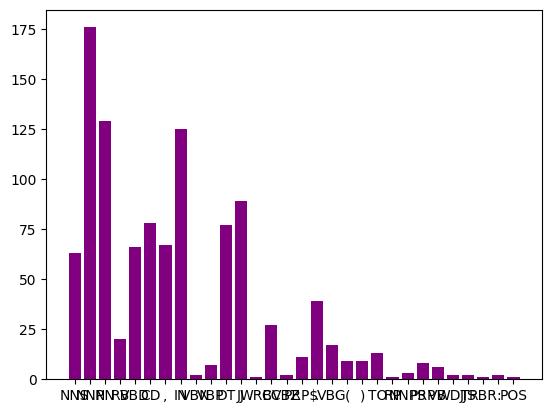

In [28]:
plt.bar(keys, values, color="purple")

And here, the pie chart:

([<matplotlib.patches.Wedge at 0x7b30835703d0>,
 [Text(1.0806265110544324, 0.20553915346309298, 'NNS'),
  Text(0.6829024356527005, 0.8623481103241367, 'NNP'),
  Text(-0.2616536998488825, 1.068427508703979, 'NN'),
  Text(-0.6956899082967535, 0.8520654619769862, 'RB'),
  Text(-0.8891464514497405, 0.6476253452995292, 'VBD'),
  Text(-1.0780967386115428, 0.21842028796601087, 'CD'),
  Text(-1.0703493631357222, -0.2536774346191518, ','),
  Text(-0.7619968083818764, -0.7933226733277159, 'IN'),
  Text(-0.41450037267896084, -1.0189158164681726, 'VBN'),
  Text(-0.3869951120146453, -1.0296770286243995, 'VBP'),
  Text(-0.11954967755537296, -1.0934842818241177, 'DT'),
  Text(0.4145003395133246, -1.018915829960129, 'JJ'),
  Text(0.6699629585664888, -0.8724388999516456, 'WRB'),
  Text(0.7404229687298716, -0.8134948232024859, 'CC'),
  Text(0.8079496393415396, -0.7464699460044432, 'VBZ'),
  Text(0.8362866715494071, -0.7145800186045048, 'PRP$'),
  Text(0.933200545412619, -0.5823544814299884, '.'),
  Text

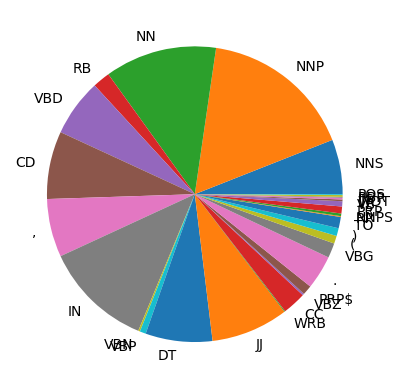

In [29]:
plt.pie(values,labels = keys)

# **Thank you for your attention.**

## That would be it from me. Let's explore more functions of *Jupyter Notebook* together in the future.